In [ ]:
# pip install --upgrade tensorflow keras

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!rm kaggle.json;

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [ ]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
train_dir= '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
filtered_classes = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=filtered_classes,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 46356 files belonging to 25 classes.


In [ ]:
training_set.class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

### Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=filtered_classes,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 11588 files belonging to 25 classes.


In [ ]:
import os
import pandas as pd
diseases = os.listdir(train_dir)
print(pd.DataFrame(diseases))

                                                    0
0                                 Blueberry___healthy
1                        Tomato___Tomato_mosaic_virus
2                              Corn_(maize)___healthy
3                               Tomato___Early_blight
4                                  Tomato___Leaf_Mold
5                             Tomato___Bacterial_spot
6            Orange___Haunglongbing_(Citrus_greening)
7                                    Tomato___healthy
8                   Cherry_(including_sour)___healthy
9                 Corn_(maize)___Northern_Leaf_Blight
10      Tomato___Spider_mites Two-spotted_spider_mite
11                                    Peach___healthy
12             Tomato___Tomato_Yellow_Leaf_Curl_Virus
13                           Apple___Cedar_apple_rust
14  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...
15         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
16                               Tomato___Target_Spot
17                          

## Building Model

In [ ]:
# plants = []
# NumberOfDiseases = 0
# for plant in diseases:
#     if plant.split('___')[0] not in plants:
#         plants.append(plant.split('___')[0])
#     if plant.split('___')[1] != 'healthy':
#         NumberOfDiseases += 1
# plants

In [ ]:
# nums = {}
# for disease in diseases:
#     nums[disease] = len(os.listdir(train_dir))
# img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
# img_per_class

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [ ]:

cnn.add(tf.keras.layers.Dense(units=25,activation='softmax'))

### Compiling and Training Phase

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │        37,525 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,823,249 (29.84 MB)

 Trainable params: 7,823,249 (29.84 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 111s 66ms/step - accuracy: 0.4000 - loss: 2.0203 - val_accuracy: 0.8152 - val_loss: 0.5600
Epoch 2/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 125s 62ms/step - accuracy: 0.8213 - loss: 0.5389 - val_accuracy: 0.8761 - val_loss: 0.3814
Epoch 3/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 0.8924 - loss: 0.3230 - val_accuracy: 0.9159 - val_loss: 0.2549
Epoch 4/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 86s 59ms/step - accuracy: 0.9245 - loss: 0.2235 - val_accuracy: 0.9336 - val_loss: 0.1955
Epoch 5/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 86s 59ms/step - accuracy: 0.9472 - loss: 0.1567 - val_accuracy: 0.9496 - val_loss: 0.1540
Epoch 6/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 145s 62ms/step - accuracy: 0.9588 - loss: 0.1217 - val_accuracy: 0.9418 - val_loss: 0.1810
Epoch 7/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 142s 61ms/step - accuracy: 0.9645 - loss: 0.1026 - val_accuracy: 0.9513 - val_loss: 0.1578
Epoch 8/10
1449/1449 ━━━━━━━━━━━━━━━━━━━━ 139s 59ms/step - accuracy: 0.

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

1449/1449 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.9869 - loss: 0.0401
Training accuracy: 0.988437294960022


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

363/363 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9548 - loss: 0.1586
Validation accuracy: 0.9573696851730347


In [ ]:
cnn.save('trained_plant_disease_model.h5')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6252912282943726,
  0.8531150221824646,
  0.9083829522132874,
  0.9360600709915161,
  0.9508585929870605,
  0.9605876207351685,
  0.9685909152030945,
  0.9726464748382568,
  0.9777159094810486,
  0.9799378514289856],
 'loss': [1.1816543340682983,
  0.4478164315223694,
  0.28025737404823303,
  0.19046582281589508,
  0.14664533734321594,
  0.11659438163042068,
  0.09164813160896301,
  0.07957674562931061,
  0.0672927126288414,
  0.05836966633796692],
 'val_accuracy': [0.8389713764190674,
  0.9082671999931335,
  0.8982568383216858,
  0.9424404501914978,
  0.9415774941444397,
  0.9489126801490784,
  0.9631515145301819,
  0.9586641192436218,
  0.963496744632721,
  0.9573696851730347],
 'val_loss': [0.4966976046562195,
  0.27615776658058167,
  0.3181946277618408,
  0.1737082451581955,
  0.18976980447769165,
  0.16421662271022797,
  0.11977158486843109,
  0.1315361112356186,
  0.11739221215248108,
  0.143754243850708]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


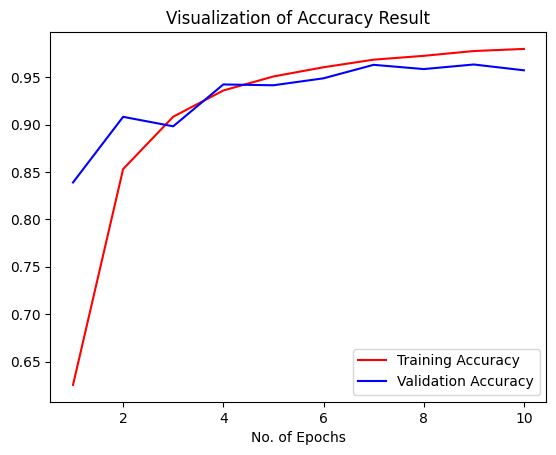

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=class_name,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 11588 files belonging to 25 classes.


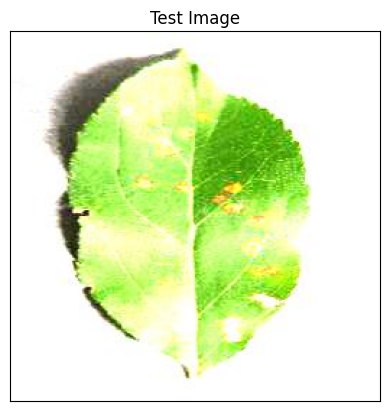

In [ ]:
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
test_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 25), dtype=tf.float32, name=None))>

In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

11588/11588 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(11588,), dtype=int64, numpy=array([ 0,  0,  0, ..., 24, 24, 24])>

In [ ]:
predicted_categories.shape

TensorShape([11588])

In [ ]:
predicted_categories.shape

TensorShape([11588])

In [ ]:
len(class_name)

25

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.99       440
                                   Apple___healthy       0.98      0.99      0.98       502
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.97      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.92      0.95       477
                            Corn_(maize)___healthy       0.99      1.00      1.00       465
                                 Grape___Black_rot       0.99      0.98      0.99       472
                      Grape___Esca_(Black_Measles)       0.98      0.99      0.

### Confusion Matrix Visualization

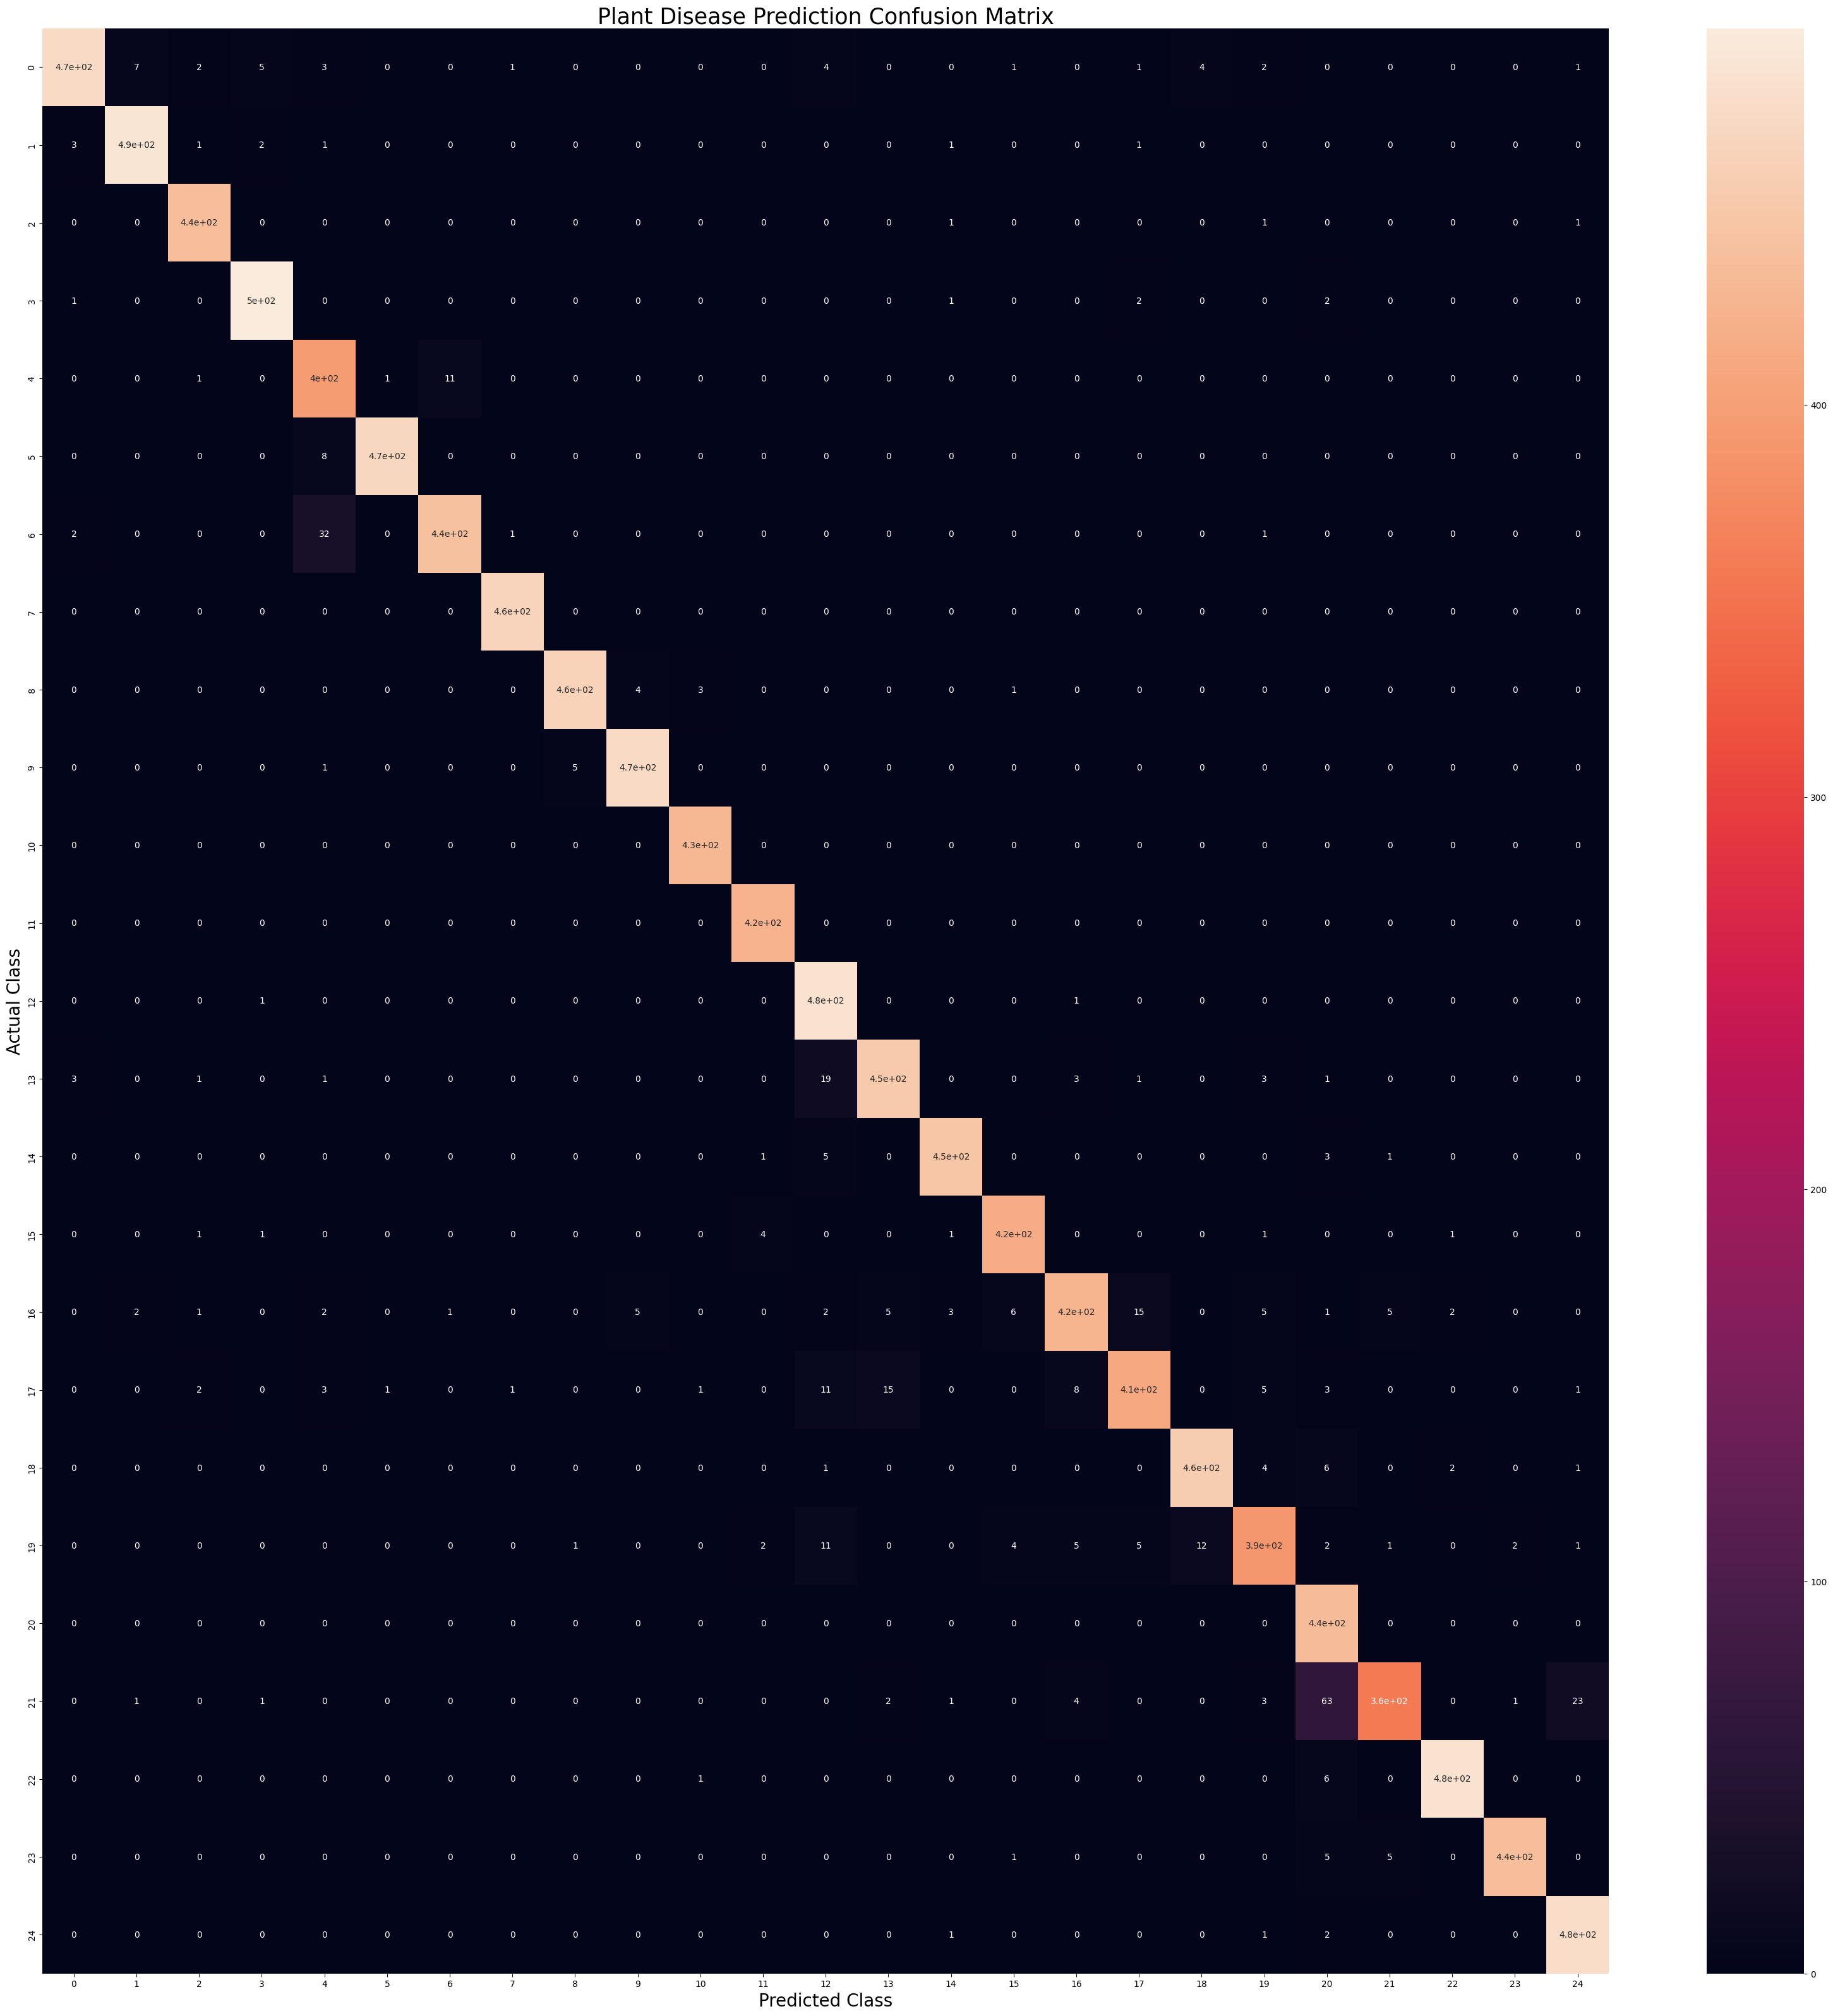

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import shap
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load pre-trained ResNet model
model = models.resnet18(pretrained=True)
model.eval()

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load an example plant disease image
image_path = "/content/apple_scab.jpg"  # Change to your image path
image = Image.open(image_path)
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Get model output
output = model(input_tensor)
pred_class = torch.argmax(output).item()

# Define SHAP masker-based explainer
masker = shap.maskers.Image("blur(10,10)", input_tensor.shape[1:])
explainer = shap.Explainer(model, masker)
shap_values = explainer(input_tensor)

# Convert SHAP values to numpy
shap_array = shap_values.values[0]  # Extract SHAP values for the input image
shap_array = np.transpose(shap_array, (1, 2, 0))  # Convert to HWC format

# Visualize SHAP heatmaps for different classes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

for i in range(2):  # Compare predicted class and another class
    axes[i+1].imshow(image)
    axes[i+1].imshow(shap_array[..., i], cmap='jet', alpha=0.5)
    axes[i+1].set_title(f"SHAP for Class {i}")
    axes[i+1].axis("off")

plt.suptitle("SHAP Explanation for Plant Disease Classification")
plt.show()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 153MB/s]


FileNotFoundError: [Errno 2] No such file or directory: '/content/apple_scab.jpg'

In [ ]:
def f(x):
  tmp = x.copy()
  preprocess_input(tmp)
  return model(tmp)
import shap
masker = shap.maskers.Image('blur(128,128)',X[0].shape)
explainer_blur = shap.Explainer(f,masker_blur,output_names=class_names)
shap_values_fine = explainer_blur(
    x[1:3],max_evals =500,batch_size = 50,outputs = shap.Explaination.argsort.flip[:4]
)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shap
from PIL import Image

# Load your TensorFlow model
model_path = "/content/trained_plant_disease_model.h5"  # Change this to your model's location
model = tf.keras.models.load_model(model_path)

# Print model summary to check the expected input shape
model.summary()

# Get the expected input shape from the model
expected_shape = model.layers[0].input_shape
img_height = expected_shape[1] if expected_shape[1] is not None else 224
img_width = expected_shape[2] if expected_shape[2] is not None else 224
print(f"Model expects input with shape: {expected_shape}")

def preprocess_image(image_path):
    # Load and preprocess the image to match the expected input shape
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # Keep a copy of the non-normalized image for display
    display_img = np.array(img)

    # Apply normalization
    img_array = img_array / 255.0

    # If your model was trained with specific preprocessing, apply it here
    # For example, if using a pretrained model like MobileNet:
    # img_array = tf.keras.applications.mobilenet.preprocess_input(img_array)

    img_array = np.expand_dims(img_array, axis=0)  # Create batch dimension
    return img_array, display_img

# Define your class names
class_names = ["Healthy", "Apple Scab", "Black Rot", "Cedar Apple Rust", "etc"]  # Replace with your actual classes

# Load an example plant disease image
image_path = "/content/apple_scab.jpg"  # Change to your image path
input_array, original_img = preprocess_image(image_path)

# Create a wrapper function that ensures preprocessing is applied correctly
def model_predict(images):
    try:
        # If images are already in the correct format, use them directly
        return model.predict(images)
    except ValueError as e:
        print(f"Error during prediction: {e}")
        # Try to reshape if needed
        batch_size = images.shape[0]
        reshaped_images = np.reshape(images, (batch_size, img_height, img_width, 3))
        return model.predict(reshaped_images)

# Test prediction with a single image first
try:
    predictions = model_predict(input_array)
    pred_idx = np.argmax(predictions[0])
    pred_class = class_names[pred_idx]
    print(f"Predicted class: {pred_class} (index: {pred_idx})")
except Exception as e:
    print(f"Error during prediction: {e}")
    print("Please check your model architecture and preprocessing steps.")
    exit(1)

# Create a masker for explaining images
masker = shap.maskers.Image("inpaint_telea", (img_height, img_width, 3))

# Create an explainer with the model and masker
explainer = shap.Explainer(model_predict, masker, output_names=class_names)

# Calculate SHAP values
shap_values = explainer(input_array)

# Visualize the SHAP values
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Original image
ax[0].imshow(original_img)
ax[0].set_title("Original Image")
ax[0].axis("off")

# SHAP visualization for the predicted class
shap.image_plot(shap_values[0, :, pred_idx], input_array[0], show=False, ax=ax[1])
ax[1].set_title(f"SHAP for {pred_class}")

plt.suptitle("SHAP Explanation for Plant Disease Classification")
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shap
from PIL import Image

# Load your TensorFlow model
model_path = "/content/trained_plant_disease_model.h5"  # Change this to your model's location
model = tf.keras.models.load_model(model_path)

# Print model summary to check the expected input shape
model.summary()

# Try to get the input shape using a different approach
try:
    # Try to get input shape from model directly
    input_shape = model.input_shape
    if input_shape is not None:
        img_height = input_shape[1] if len(input_shape) > 1 and input_shape[1] is not None else 224
        img_width = input_shape[2] if len(input_shape) > 2 and input_shape[2] is not None else 224
    else:
        # Default values if we can't determine
        img_height, img_width = 224, 224
except:
    # Default values if error occurs
    img_height, img_width = 224, 224

print(f"Using image dimensions: {img_height}x{img_width}")

def preprocess_image(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # Keep a copy of the non-normalized image for display
    display_img = np.array(img)

    # Apply normalization
    img_array = img_array / 255.0

    # Create batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, display_img

# Define your class names
class_names = ["Healthy", "Apple Scab", "Black Rot", "Cedar Apple Rust", "etc"]  # Replace with your actual classes

# Load an example plant disease image
image_path = "/content/apple_scab.jpg"  # Change to your image path
input_array, original_img = preprocess_image(image_path)

# Try different preprocessing approaches if the model fails
def try_prediction(model, input_array):
    try:
        # Standard prediction
        return model.predict(input_array), "standard"
    except Exception as e1:
        print(f"Standard prediction failed: {e1}")
        try:
            # Try with mobilenet preprocessing
            preprocessed = tf.keras.applications.mobilenet.preprocess_input(input_array * 255.0)
            return model.predict(preprocessed), "mobilenet"
        except Exception as e2:
            print(f"MobileNet preprocessing failed: {e2}")
            try:
                # Try with inception preprocessing
                preprocessed = tf.keras.applications.inception_v3.preprocess_input(input_array * 255.0)
                return model.predict(preprocessed), "inception"
            except Exception as e3:
                print(f"Inception preprocessing failed: {e3}")
                return None, "failed"

# Try prediction with different preprocessing
predictions, method_used = try_prediction(model, input_array)
if predictions is None:
    print("All prediction attempts failed. Please check your model architecture and preprocessing.")
    exit(1)

print(f"Successful prediction using {method_used} preprocessing")
pred_idx = np.argmax(predictions[0])
pred_class = class_names[pred_idx]
print(f"Predicted class: {pred_class} (index: {pred_idx})")

# Define prediction function for SHAP
def model_predict(images):
    # Apply the same preprocessing that worked
    if method_used == "mobilenet":
        images = tf.keras.applications.mobilenet.preprocess_input(images * 255.0)
    elif method_used == "inception":
        images = tf.keras.applications.inception_v3.preprocess_input(images * 255.0)

    return model.predict(images)

# Create a masker for explaining images
masker = shap.maskers.Image("inpaint_telea", (img_height, img_width, 3))

# Create an explainer with the model and masker
explainer = shap.Explainer(model_predict, masker, output_names=class_names)

# Calculate SHAP values
shap_values = explainer(input_array)

# Visualize the SHAP values
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Original image
ax[0].imshow(original_img)
ax[0].set_title("Original Image")
ax[0].axis("off")

# SHAP visualization for the predicted class
shap.image_plot(shap_values)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shap
from PIL import Image

# Load your TensorFlow model
model_path = "/content/trained_plant_disease_model.h5"  # Change this to your model's location
model = tf.keras.models.load_model(model_path)

# Print model summary to understand its architecture
print("Model summary:")
model.summary()

# Default image dimensions
img_height, img_width = 224, 224
print(f"Using image dimensions: {img_height}x{img_width}")

def preprocess_image(image_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # Keep a copy of the non-normalized image for display
    display_img = np.array(img)

    # Apply normalization
    img_array = img_array / 255.0

    # Create batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, display_img

# Load an example plant disease image
image_path = "/content/apple_scab.jpg"  # Change to your image path
input_array, original_img = preprocess_image(image_path)

# Try prediction and print detailed output
try:
    predictions = model.predict(input_array)
    print("Raw prediction output shape:", predictions.shape)
    print("Raw prediction values:", predictions)

    # Get the number of classes in the model's output
    num_classes = predictions.shape[1] if len(predictions.shape) > 1 else 1
    print(f"Model appears to have {num_classes} output classes")

    # Get prediction index
    pred_idx = np.argmax(predictions[0])
    print(f"Predicted class index: {pred_idx}")

    # Define your class names - NOW DYNAMICALLY SIZED based on model output
    class_names = [f"Class_{i}" for i in range(num_classes)]
    print(f"Using generic class names: {class_names}")

    # Safe class access
    pred_class = class_names[pred_idx] if pred_idx < len(class_names) else f"Unknown_Class_{pred_idx}"
    print(f"Predicted class: {pred_class}")

except Exception as e:
    print(f"Error during prediction: {e}")
    print("Using basic preprocessing failed. Let's try a different approach.")
    try:
        # Try with a standard preprocessing used in transfer learning
        preprocessed = input_array * 2.0 - 1.0  # Scale to [-1, 1]
        predictions = model.predict(preprocessed)
        print("Prediction successful with [-1, 1] scaling")
        print("Raw prediction output shape:", predictions.shape)
        print("Raw prediction values:", predictions)

        # Get the number of classes in the model's output
        num_classes = predictions.shape[1] if len(predictions.shape) > 1 else 1
        print(f"Model appears to have {num_classes} output classes")

        # Get prediction index
        pred_idx = np.argmax(predictions[0])
        print(f"Predicted class index: {pred_idx}")

        # Define your class names - DYNAMICALLY SIZED based on model output
        class_names = [f"Class_{i}" for i in range(num_classes)]
        print(f"Using generic class names: {class_names}")

        # Safe class access
        pred_class = class_names[pred_idx] if pred_idx < len(class_names) else f"Unknown_Class_{pred_idx}"
        print(f"Predicted class: {pred_class}")
    except Exception as e2:
        print(f"Second attempt also failed: {e2}")
        print("Please provide more details about your model for further assistance.")
        exit(1)

# Define prediction function for SHAP
def model_predict(images):
    return model.predict(images)

# Visualize the original image
plt.figure(figsize=(8, 8))
plt.imshow(original_img)
plt.title(f"Original Image\nPredicted as: {pred_class}")
plt.axis("off")
plt.show()

print("For proper SHAP analysis, please provide:")
print("1. How many classes does your model predict?")
print("2. What are the actual class names?")
print("3. What preprocessing did you use during training?")
print("4. What base architecture did you use (MobileNet, InceptionV3, custom CNN, etc.)?")

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shap
import cv2
import os

# Define class names
class_names = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
    'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot',
    'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'
]

# Load model
model_path = "trained_plant_disease_model.h5"
model = tf.keras.models.load_model(model_path)

# Image dimensions
img_height, img_width = 128, 128

def preprocess_image(image_path):
    """Preprocess an image for model prediction"""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (img_height, img_width))

    # Normalize image
    img_array = img_resized / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    return img_array, img_resized  # Return both preprocessed and display images

def model_predict(images):
    """Model prediction function for SHAP"""
    return model.predict(images)

# Test images
image_paths = [
    "/content/test/test/TomatoHealthy3.JPG",
    "/content/test/test/PotatoEarlyBlight1.JPG",
    "/content/test/test/AppleCedarRust1.JPG",
    "/content/test/test/CornCommonRust1.JPG"
]

# Process images
processed_images = []
display_images = []
predicted_classes = []
predictions = []

for image_path in image_paths:
    if os.path.exists(image_path):
        img_array, display_img = preprocess_image(image_path)
        processed_images.append(img_array)
        display_images.append(display_img)

        # Make predictions
        pred = model.predict(img_array)
        predictions.append(pred)

        # Get predicted class
        pred_idx = np.argmax(pred[0])
        pred_class = class_names[pred_idx]
        predicted_classes.append(pred_class)

        print(f"Image: {os.path.basename(image_path)}")
        print(f"Predicted as: {pred_class} (confidence: {pred[0][pred_idx]:.4f})")
    else:
        print(f"Image not found: {image_path}")

# Ensure we have valid images
if not processed_images:
    print("No valid images found.")
    exit(1)

# SHAP Analysis Setup
masker = shap.maskers.Image("inpaint_telea", (img_height, img_width, 3))
explainer = shap.Explainer(model_predict, masker, output_names=class_names)

# Compute SHAP values
all_shap_values = [explainer(img_array) for img_array in processed_images]

# Visualize Predictions
fig, axes = plt.subplots(1, len(display_images), figsize=(15, 5))
if len(display_images) == 1:
    axes = [axes]

for i, (img, pred_class) in enumerate(zip(display_images, predicted_classes)):
    axes[i].imshow(img)
    axes[i].set_title(f"Predicted: {pred_class.split('___')[1]}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# SHAP Visualization (Fixed)
for i, (img_array, shap_values, pred) in enumerate(zip(processed_images, all_shap_values, predictions)):
    pred_idx = np.argmax(pred[0])
    pred_class = class_names[pred_idx]

    print(f"Generating SHAP visualization for {pred_class.split('___')[1]}")

    # Sum over color channels if needed (ensuring correct shape)
    shap_values_reshaped = np.sum(shap_values.values[0], axis=-1)  # Shape: (128, 128)

    # Ensure the image is a NumPy array in the correct format
    pixel_values = np.array(display_images[i], dtype=np.float32) / 255.0  # Shape: (128, 128, 3)

    print("SHAP Values Shape:", shap_values_reshaped.shape)  # Should be (128, 128)
    print("Pixel Values Shape:", pixel_values.shape)  # Should be (128, 128, 3)

    # SHAP Visualization (Corrected Input Format)
    shap.image_plot([shap_values_reshaped], pixel_values)
# SHAP Comparison Across Images
if len(processed_images) > 1:
    fig, axes = plt.subplots(len(processed_images), 2, figsize=(12, 4 * len(processed_images)))
    plt.suptitle("Comparison of SHAP Explanations Across Images", fontsize=16)

    for i, (img, shap_values, pred) in enumerate(zip(display_images, all_shap_values, predictions)):
        pred_idx = np.argmax(pred[0])
        pred_class = class_names[pred_idx]

        print(f"Comparing SHAP visualization for {pred_class.split('___')[1]}")

        # Ensure SHAP values are properly formatted (H, W, 1)
        shap_values_reshaped = np.sum(shap_values.values[0], axis=-1, keepdims=True)  # Shape: (128, 128, 1)

        # Convert image to NumPy array (H, W, 3)
        pixel_values = np.array(img, dtype=np.float32) / 255.0  # Shape: (128, 128, 3)

        print("SHAP Values Shape:", shap_values_reshaped.shape)  # Should be (128, 128, 1)
        print("Pixel Values Shape:", pixel_values.shape)  # Should be (128, 128, 3)

        # Original Image
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f"Image {i+1}: {pred_class.split('___')[1]}")
        axes[i, 0].axis("off")

        # SHAP Visualization (Corrected)
        shap.image_plot(shap_values_reshaped, pixel_values)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the title
    plt.savefig("shap_comparison.png", dpi=300, bbox_inches="tight")
    plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
import shap
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [ ]:
model = ResNet50(weights='imagenet')
X,y = shap.datasets.imagenet50()
url

In [ ]:
import json
import os
import numpy as np
import cv2
import shap
import tensorflow as tf
import matplotlib.pyplot as plt

# Load your trained model
model_path = "trained_plant_disease_model.h5"  # Update this with your actual model path
model = tf.keras.models.load_model(model_path)

# Define the class names from your dataset
class_names = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
    'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot',
    'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'
]

# Image size (update based on your model's input shape)
img_height, img_width = 128, 128  # Update if different

def preprocess_image(image_path):
    """Load and preprocess an image for model prediction."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_resized = cv2.resize(img, (img_height, img_width))  # Resize to match model input

    # Normalize and add batch dimension
    img_array = np.expand_dims(img_resized.astype(np.float32) / 255.0, axis=0)  # Shape: (1, 128, 128, 3)

    return img_array, img_resized  # Normalized input + display image

# Function for model predictions
def model_predict(images):
    return model.predict(images)

# Test image paths (update these with actual test images)
image_paths = [
    "/content/test/test/PotatoEarlyBlight3.JPG",
    "/content/test/test/TomatoEarlyBlight1.JPG",
]

# Process images
processed_images = []
display_images = []

for img_path in image_paths:
    if os.path.exists(img_path):
        img_array, display_img = preprocess_image(img_path)
        processed_images.append(img_array)
        display_images.append(display_img)
    else:
        print(f"Image not found: {img_path}")

# Ensure at least 2 images exist for SHAP analysis
if len(processed_images) < 2:
    raise ValueError("Need at least 2 valid images for SHAP analysis!")

# Convert list to NumPy array for SHAP
processed_images = np.vstack(processed_images)  # Shape: (N, 128, 128, 3)

# Define SHAP masker using blur instead of inpaint_telea
masker = shap.maskers.Image("blur(32,32)", (img_height, img_width, 3))

# Create SHAP Explainer
explainer = shap.Explainer(model_predict, masker, output_names=class_names)

# Compute SHAP values for selected images (only the top predicted class)
shap_values = explainer(processed_images[:2], max_evals=1000, batch_size=50, outputs=shap.Explanation.argsort.flip[:3])

# Normalize SHAP values to avoid tiny values causing blank visualizations
for i in range(len(shap_values.values)):
    shap_values.values[i] /= np.max(np.abs(shap_values.values[i]))  # Normalize to [-1, 1]

# Display SHAP Explanations
shap.image_plot(shap_values)


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Load trained model
model_path = "trained_plant_disease_model.h5"  # Update with actual model path
model = tf.keras.models.load_model(model_path)

# Find the last convolutional layer automatically
conv_layers = [layer.name for layer in model.layers if "conv" in layer.name]
target_layer = model.get_layer(conv_layers[-1])  # Fix: Get layer, not output

print(f"Using {conv_layers[-1]} as target layer for Grad-CAM.")

# Define Grad-CAM function
def grad_cam(model, image_array, class_idx, target_layer):
    grad_model = Model(inputs=model.input, outputs=[target_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image_array)
        loss = predictions[:, class_idx]  # Focus on target class

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = np.mean(conv_outputs * pooled_grads, axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1

    return heatmap

# Function to preprocess image
def preprocess_image(image_path, img_size=(128, 128)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size) / 255.0
    img_array = np.expand_dims(img, axis=0)
    return img_array, img

# Overlay heatmap on image
def overlay_gradcam(image, heatmap, alpha=0.5):
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
    return superimposed_img

# List of test images
image_paths = [
    "/content/test/test/TomatoHealthy3.JPG",
    "/content/test/test/PotatoEarlyBlight1.JPG"
]  # Update with actual paths

# Generate Grad-CAM visualizations
for image_path in image_paths:
    image_array, original_image = preprocess_image(image_path)
    pred = model.predict(image_array)
    class_idx = np.argmax(pred[0])

    heatmap = grad_cam(model, image_array, class_idx, target_layer)  # Fix: Pass layer, not output tensor
    gradcam_output = overlay_gradcam(original_image, heatmap)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(gradcam_output)
    plt.title(f"Grad-CAM: {class_idx}")
    plt.axis("off")

    plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential

# Load the trained model to get its configuration and weights
loaded_model = tf.keras.models.load_model("trained_plant_disease_model.h5")

# Extract configuration and weights
config = loaded_model.get_config()
weights = loaded_model.get_weights()

# Reconstruct the Sequential model from the configuration
model = Sequential.from_config(config)

# Set the weights to the reconstructed model
model.set_weights(weights)

# Build the model by running a forward pass (this ensures model.input is defined)
dummy_input = tf.random.normal((1, 128, 128, 3))
_ = model.predict(dummy_input)  # Builds the graph and defines model.input

# Debugging: Verify model.input is defined
print("Model input after reconstruction and predict:", model.input)

# Identify the last convolutional layer
last_conv_layer_name = "conv2d_9"  # Verify this matches your model
last_conv_layer = model.get_layer(last_conv_layer_name)

# Define Grad-CAM model (from input to last conv layer output)
last_conv_layer_model = Model(inputs=model.input, outputs=last_conv_layer.output)

# Define classifier model (from last conv layer output to final prediction)
classifier_layer_names = ["flatten", "dense", "dropout", "dense_1"]
classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
    layer = model.get_layer(layer_name)
    x = layer(x)
classifier_model = Model(classifier_input, x)

def preprocess_image(img_path):
    """Preprocess the image for model input."""
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Could not load image at {img_path}")
    img = cv2.resize(img, (128, 128))
    img = img.astype(np.float32) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img, axis=0)  # Add batch dimension
    return img, img_array

def compute_gradcam(img_array):
    """Compute Grad-CAM heatmap."""
    with tf.GradientTape() as tape:
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    grads = tape.gradient(top_class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(last_conv_layer_output, axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU
    heatmap /= np.max(heatmap) + 1e-10  # Normalize, avoid division by zero
    return heatmap

def overlay_gradcam(original_image, heatmap, alpha=0.4):
    """Overlay heatmap on the original image."""
    heatmap = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap, alpha, 0)
    return superimposed_img

# Load and process test image
test_img_path = "test/test/AppleCedarRust1.JPG"
original_img, img_array = preprocess_image(test_img_path)

# Compute Grad-CAM heatmap
heatmap = compute_gradcam(img_array)

# Overlay heatmap on original image
overlayed_img = overlay_gradcam(original_img, heatmap)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM Overlay")
plt.axis("off")

plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt

# # ✅ Define the training dataset directory
# train_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

# ✅ Count the number of images per class
class_counts = {}
for class_name in sorted(os.listdir(train_dir)):  # Sort for ordered display
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory (class folder)
        class_counts[class_name] = len(os.listdir(class_path))

# ✅ Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=90)  # Rotate class names for readability
plt.xlabel("Class Names")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Dataset")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# ✅ Show the plot
plt.show()
